# Dataset Info

Dataset can be downloaded from:
https://www.kaggle.com/osmi/mental-health-in-tech-survey

The following source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 was used as a guide in creating this notebook, and is also cited in the report

This program uses a survey from tech employees from 2014, regarding the attitudes and frequency of mental illnesses in the industry. The dataset contains 1259 data points, along with 27 features per sample. This program uses the Logisitic Regression machine learning algorithm in an attempt to classify whether an employee has sought treatment for a mental health issue based off of the rest of the features present in the dataset. Below is an explanation of the features present in the dataset taken from https://www.kaggle.com/osmi/mental-health-in-tech-survey

# Dataset Columns

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Reads in the data to a pandas dataframe

missing_values = 0.0
raw_data = pd.read_csv("survey.csv", header = 0, na_values = missing_values)

In [3]:
# Displays number of rows and columns present in the dataset

rows, cols = raw_data.shape
print("Rows: ",rows)
print("Columns:",cols)

Rows:  1259
Columns: 27


In [4]:
# Displays the raw dataframe
raw_data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [5]:
# Lists the column headers

print(list(raw_data.columns))

['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


# Initial Data Exploration

In [6]:
# These rows are being removed, due to containing invalid ages

data = raw_data.drop(labels=None, axis=0, index=[143,364,390,715,734,989,1127])

The output class is relatively balanced within this dataset

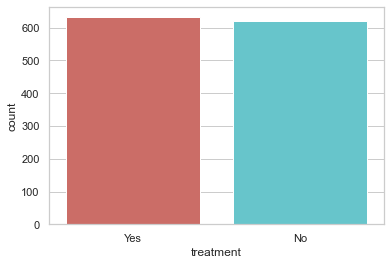

In [7]:
sns.countplot(x = 'treatment', data = data, palette = 'hls')
plt.show()

Most of the data comes from the United States and United Kingdom

In [8]:
data['Country'].value_counts()

United States             747
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Austria                     3
Finland                     3
Denmark                     2
Greece                      2
Portugal                    2
Croatia                     2
Colombia                    2
Uruguay                     1
Czech Republic              1
Moldova                     1
Georgia                     1
Latvia    

One of the more telling features of the dataset is family_history, those with a history of mental illness in their family were much more likely to seek treatment for a mental illness themselves

Text(0, 0.5, 'Treatment')

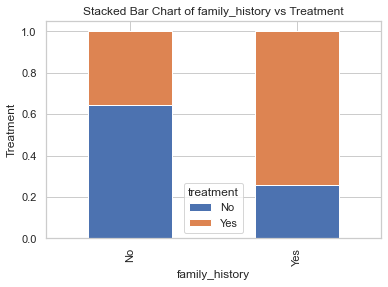

In [9]:
table=pd.crosstab(data.family_history,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of family_history vs Treatment')
plt.xlabel('family_history')
plt.ylabel('Treatment')

# Data Cleaning

For further analysis of the data, most of the columns need to be cleaned up for a clearer understanding

For the purpose of simplifying the analysis, the following columns are being dropped as features from the data set: Timestamp, Country, State, and Comments

In [10]:
# Dropping Timestamp, comments, country, and state

data = data.drop(['Timestamp','comments','Country','state'], axis = 1)

In [11]:
# Missing Values in the table are being replaced with the value 0.0, in most of the columns, an N/A response is similar
# to a negative response, so that is the thought behind this replacement

data.fillna(value = 0.0, axis = 1, inplace = True)

Data present in the table mostly consists of strings as the answers to survey questions, so these responses are being converted to numeric values between 0 and 1 so that they can be used for logistic regression

In [12]:
# Replacing yes/no/maybe with 1/0/0.5
# This is a global replacement of values to avoid replacement for each individual column

data = data.replace({"Yes": 1,"No": 0,"Maybe": 0.5})

# Replacing genders with numeric values, spelling mistakes were interpreted as close as possible
# Male = 0, Female = 1, Others Genders = 0.5

data['Gender'] = data['Gender'].replace(["m","M","male","Male","Male ","Man",
                                         "Mal","Malr","man","msle",'maile','Mail','Make'], 0.0)
data['Gender'] = data['Gender'].replace(["f","F","female","Female","Female ", "Woman","woman","femail",'Femake'] , 1.0)
data['Gender'] = data['Gender'].replace(['Cis Male','Female (trans)',
                                         'ostensibly male, unsure what that really means',
                                         'something kinda male?','Male-ish','queer','p',
                                         'Female (cis)','Trans-female','Male (CIS)','Guy (-ish) ^_^',
                                         'Nah','Enby','fluid','queer/she/they','A little about you',
                                         'cis-female/femme','male leaning androgynous','Neuter',
                                         'Genderqueer','non-binary','Trans woman','Androgyne','Cis Man',
                                         'Cis Female','Agender','cis male'],0.5)

# Replacing work inteference with numeric values
# Never = 0.0 , Rarely = 1/3 , Sometimes = 2/3 , Often = 1.0

data['work_interfere'] = data['work_interfere'].replace({"Never": 0.0, "Rarely": (0.33333), "Sometimes": (0.66666),
                                                         "Often": 1.0})
# Replacing number of employees with numeric values
# 1-5 = 0.0 , 6-25 = 0.2 , 26-100 = 0.4, 100-500 = 0.6 , 500-1000 = 0.8, More than 1000 = 1.0

data['no_employees'] = data['no_employees'].replace({"1-5": 0.0, "6-25": 0.2, "26-100" : 0.4, "100-500": 0.6,
                                                     "500-1000" : 0.8, "More than 1000": 1.0})

# Replacing Don't know in benefits col with numeric value
# Don't know = 0.5

data['benefits'] = data['benefits'].replace({"Don't know" : 0.5})

# Replacing Not sure in care_options col with numeric values
# Not sure = 0.5

data['care_options'] = data['care_options'].replace({"Not sure" : 0.5})

# Replacing Don't know in wellness_program col with a numeric value
# Don't know = 0.5

data['wellness_program'] = data['wellness_program'].replace({"Don't know" : 0.5})

# Replacing Don't know in seek_help col with a numeric value
# Don't know = 0.5

data['seek_help'] = data['seek_help'].replace({"Don't know" : 0.5})

# Replacing Don't know in anonymity col with numeric values
# Don't know = 0.5

data['anonymity'] = data['anonymity'].replace({"Don't know" : 0.5})

# Replacing leave with numeric values
# Very easy = 0.0 , Somewhat easy  = 0.25 , Don't Know = 0.50 , Somewhat Difficult = 0.75 , Very Difficult = 1.0

data['leave'] = data['leave'].replace({"Don't know" : 0.5, "Very easy":0.0, "Somewhat easy": 0.25, "Somewhat difficult":0.75,
                                       "Very difficult":1.0})

# Replacing Some of them in coworkers col with numeric values
# Some of them = 0.5

data['coworkers'] = data['coworkers'].replace({"Some of them" : 0.5})

# Replacing Some of them in coworkers col with numeric values
# Some of them  = 0.5

data['supervisor'] = data['supervisor'].replace({"Some of them" : 0.5})

# Replacing Don't know in mental_vs_physical col with numeric values
# Don't Know = 0.5

data['mental_vs_physical'] = data['mental_vs_physical'].replace({"Don't know" : 0.5})

In [13]:
data.astype("float64")

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,1.0,0.0,0.0,1.0,1.00000,0.2,0.0,1.0,1.0,...,1.0,0.25,0.0,0.0,0.5,1.0,0.0,0.5,1.0,0.0
1,44.0,0.0,0.0,0.0,0.0,0.33333,1.0,0.0,0.0,0.5,...,0.5,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0
2,32.0,0.0,0.0,0.0,0.0,0.33333,0.2,0.0,1.0,0.0,...,0.5,0.75,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,31.0,0.0,0.0,1.0,1.0,1.00000,0.4,0.0,1.0,0.0,...,0.0,0.75,1.0,1.0,0.5,0.0,0.5,0.5,0.0,1.0
4,31.0,0.0,0.0,0.0,0.0,0.00000,0.6,1.0,1.0,1.0,...,0.5,0.50,0.0,0.0,0.5,1.0,1.0,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26.0,0.0,0.0,0.0,1.0,0.00000,0.4,0.0,1.0,0.0,...,0.5,0.25,0.0,0.0,0.5,0.5,0.0,0.0,0.5,0.0
1255,32.0,0.0,0.0,1.0,1.0,1.00000,0.4,1.0,1.0,1.0,...,1.0,0.75,0.0,0.0,0.5,1.0,0.0,0.0,1.0,0.0
1256,34.0,0.0,0.0,1.0,1.0,0.66666,1.0,0.0,1.0,1.0,...,0.5,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1257,46.0,1.0,0.0,0.0,0.0,0.00000,0.6,1.0,1.0,0.0,...,0.5,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Further Data Exploration

Now that the data has been cleaned up a bit more, some of the other columns can be looked at

Looking at gender(Male = 0, Female = 1, Others Genders = 0.5) for example show that the data is mostly comprised of males (Not uncommon for the tech industry), and that both females, and those of other genders were more likely to have sought treatment for a mental illness

In [14]:
data["Gender"].value_counts()

0.0    981
1.0    244
0.5     27
Name: Gender, dtype: int64

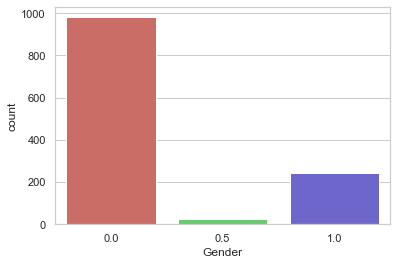

In [15]:
sns.countplot(x = 'Gender', data = data, palette = 'hls')
plt.show()

Text(0, 0.5, 'Treatment')

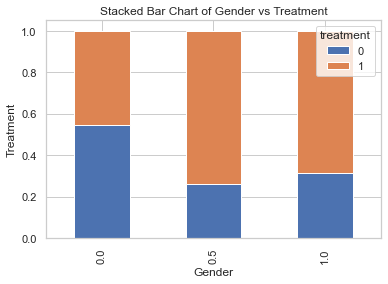

In [16]:
table=pd.crosstab(data.Gender,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Treatment')
plt.xlabel('Gender')
plt.ylabel('Treatment')

Looking next at employees who work mostly remote vs in person, shows that it seems remote work has little impact on an employee seeking treatment for a mental illness or disorder

In [17]:
data["remote_work"].value_counts()

0    880
1    372
Name: remote_work, dtype: int64

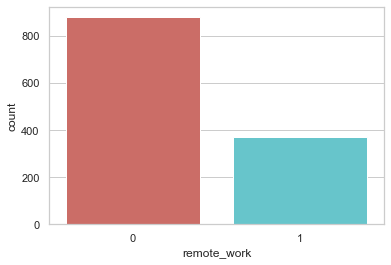

In [18]:
sns.countplot(x = 'remote_work', data = data, palette = 'hls')
plt.show()

Text(0, 0.5, 'Treatment')

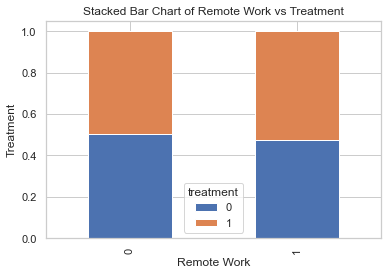

In [19]:
table=pd.crosstab(data.remote_work,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Remote Work vs Treatment')
plt.xlabel('Remote Work')
plt.ylabel('Treatment')

For those with a mental illness, the degree (Never = 0.0 , Rarely = 1/3 , Sometimes = 2/3 , Often = 1.0) to which that illness inteferes with their work had a big impact on whether they sought treatment for it

In [20]:
data["work_interfere"].value_counts()

0.00000    475
0.66666    464
0.33333    173
1.00000    140
Name: work_interfere, dtype: int64

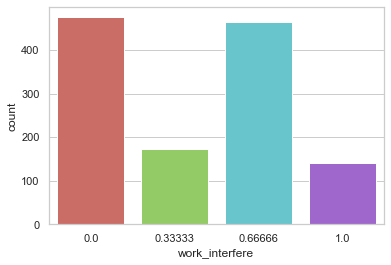

In [21]:
sns.countplot(x = 'work_interfere', data = data, palette = 'hls')
plt.show()

Text(0, 0.5, 'Treatment')

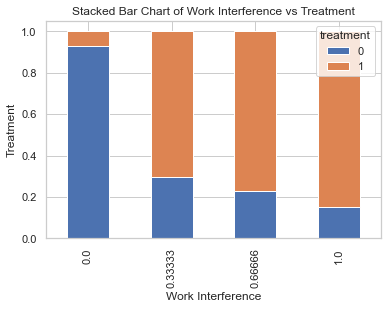

In [22]:
table=pd.crosstab(data.work_interfere,data.treatment)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Work Interference vs Treatment')
plt.xlabel('Work Interference')
plt.ylabel('Treatment')

Grouping columns by their mean, shows which features have a significant impact on the result on the outcome of the their class, by looking at the difference between the two. Those with a greater difference seems to have a bigger impact

In [23]:
data.groupby('treatment').mean()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
treatment,,,,,,,,,,,,,,,,,,,,,
0,31.501613,0.128226,0.109677,0.204839,0.176343,0.479677,0.285484,0.832258,0.482258,0.374194,...,0.596774,0.405645,0.370968,0.142742,0.46371,0.562903,0.129839,0.380645,0.523387,0.090323
1,32.607595,0.281646,0.118671,0.572785,0.629215,0.489873,0.308544,0.806962,0.597310,0.576741,...,0.649525,0.452532,0.468354,0.167722,0.50712,0.534810,0.101266,0.382911,0.478639,0.197785


The age column still needs to be normalized so the next two cells accomplish this

In [24]:
normalized_data=(data-data.min())/(data.max()-data.min())

In [25]:
normalized_data.groupby('treatment').mean()

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
treatment,,,,,,,,,,,,,,,,,,,,,
0.0,0.336092,0.128226,0.109677,0.204839,0.176343,0.479677,0.285484,0.832258,0.482258,0.374194,...,0.596774,0.405645,0.370968,0.142742,0.46371,0.562903,0.129839,0.380645,0.523387,0.090323
1.0,0.354223,0.281646,0.118671,0.572785,0.629215,0.489873,0.308544,0.806962,0.597310,0.576741,...,0.649525,0.452532,0.468354,0.167722,0.50712,0.534810,0.101266,0.382911,0.478639,0.197785


In [26]:
#shows the correlation matrix for the data

normalized_data.corr()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,-0.084000,0.066477,0.010913,0.075679,0.008241,0.120027,0.142735,-0.058964,0.116451,...,0.038385,0.050157,0.070188,0.095851,-0.007395,0.009554,-0.034881,-0.061568,-0.031361,0.071854
Gender,-0.084000,1.000000,-0.043662,0.145921,0.192989,0.119261,0.083974,-0.011035,-0.075856,0.151723,...,0.011035,0.041958,0.098102,0.085234,-0.057168,-0.090784,-0.124075,-0.131071,0.011165,0.075850
self_employed,0.066477,-0.043662,1.000000,0.000761,0.014137,0.075541,-0.389549,0.316017,0.077127,-0.265791,...,0.045410,0.012489,-0.068915,0.020715,0.073532,0.035933,0.071266,0.031280,0.125478,0.066598
family_history,0.010913,0.145921,0.000761,1.000000,0.377070,0.332544,0.030329,0.013277,-0.049930,0.135269,...,0.022302,0.034866,0.093685,0.050441,-0.002486,0.002621,-0.072646,-0.044892,-0.061805,0.117808
treatment,0.075679,0.192989,0.014137,0.377070,1.000000,0.633124,0.014941,0.025230,-0.032884,0.140719,...,0.098269,0.085842,0.126322,0.045095,0.070182,-0.033317,-0.057955,0.003205,-0.060805,0.152783
work_interfere,0.008241,0.119261,0.075541,0.332544,0.633124,1.000000,-0.069423,0.052248,-0.016341,0.015752,...,0.017488,0.130891,0.197938,0.074484,0.017735,-0.068171,-0.080174,0.042741,-0.111714,0.178057
no_employees,0.120027,0.083974,-0.389549,0.030329,0.014941,-0.069423,1.000000,-0.239501,-0.252162,0.462805,...,0.079326,0.036491,0.110427,0.020300,-0.130750,-0.097584,-0.117354,-0.071812,-0.087702,0.050903
remote_work,0.142735,-0.011035,0.316017,0.013277,0.025230,0.052248,-0.239501,1.000000,0.132466,-0.106910,...,0.000614,-0.017309,-0.010373,0.020253,0.078264,0.022285,0.082005,0.032006,0.081716,-0.043634
tech_company,-0.058964,-0.075856,0.077127,-0.049930,-0.032884,-0.016341,-0.252162,0.132466,1.000000,-0.088315,...,-0.020203,-0.053043,-0.116111,-0.051667,0.072193,0.049314,0.080742,0.001670,0.119544,-0.066892
benefits,0.116451,0.151723,-0.265791,0.135269,0.140719,0.015752,0.462805,-0.106910,-0.088315,1.000000,...,0.244017,-0.123818,-0.035314,-0.071221,0.010905,0.039577,-0.036292,-0.099643,0.099355,-0.037786


In [27]:
# Splits the data into x columns, and the output class y

x_cols = ['Age', 'Gender','self_employed', 'family_history','work_interfere', 'no_employees',
          'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
          'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
          'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
          'mental_vs_physical', 'obs_consequence']


X = normalized_data[x_cols]

Y = normalized_data['treatment']

# Classification

The section of the notebook goes through using four different classifiers(Logisitic Regression, Gaussian Naive Bayes, C-Support Vector, and Multi-layer Perceptron) and comparing their results to determine which one performed the best. Accuracy is useed as the main metric for comparison, since the output classes are so balanced in the dataset

# Logistic Regression

In [28]:
# Shuffles the data

normalized_data = normalized_data.sample(frac = 1)

# Splitting data into a train and test set, test set size = 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Length of Training set: " , len(x_train))
print("Length of Testing  set: " , len(x_test))
lr = LogisticRegression()
lr.fit(x_train, y_train)

Length of Training set:  1001
Length of Testing  set:  251


LogisticRegression()

In [29]:
# Tests the accuracy of the classifier on the test data

y_pred = lr.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(x_test, y_test)))
lr_accuracy = lr.score(x_test, y_test)

Accuracy of logistic regression classifier on test set: 0.84


In [30]:
#displays the confusion matrix for the classifier

lr_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(lr_confusion_matrix)

Confusion Matrix: 
[[ 99  24]
 [ 16 112]]


In [31]:
#Gives Classification report for the classifier(Precision, Recall, F1 score, Support)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       123
         1.0       0.82      0.88      0.85       128

    accuracy                           0.84       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.84      0.84      0.84       251



# Gaussian Naive Bayes

In [32]:
# Shuffles the data

normalized_data = normalized_data.sample(frac = 1)

# Splitting data into a train and test set, test set size = 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Length of Training set: " , len(x_train))
print("Length of Testing  set: " , len(x_test))
nb = GaussianNB()
nb.fit(x_train,y_train)

Length of Training set:  1001
Length of Testing  set:  251


GaussianNB()

In [33]:
# Tests the accuracy of the classifier on the test data

y_pred = nb.predict(x_test)
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}'.format(nb.score(x_test, y_test)))
nb_accuracy = nb.score(x_test, y_test)

Accuracy of Gaussian Naive Bayes classifier on test set: 0.79


In [34]:
#displays the confusion matrix for the classifier

nb_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(nb_confusion_matrix)

Confusion Matrix: 
[[ 94  25]
 [ 28 104]]


In [35]:
#Gives Classification report for the classifier(Precision, Recall, F1 score, Support)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       119
         1.0       0.81      0.79      0.80       132

    accuracy                           0.79       251
   macro avg       0.79      0.79      0.79       251
weighted avg       0.79      0.79      0.79       251



# C-Support Vector

In [36]:
# Shuffles the data

normalized_data = normalized_data.sample(frac = 1)

# Splitting data into a train and test set, test set size = 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Length of Training set: " , len(x_train))
print("Length of Testing  set: " , len(x_test))
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(x_train,y_train)

Length of Training set:  1001
Length of Testing  set:  251


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [37]:
# Tests the accuracy of the classifier on the test data

y_pred = svc.predict(x_test)
print('Accuracy of C-Support Vector Classification classifier on test set: {:.2f}'.format(svc.score(x_test, y_test)))
svc_accuracy = svc.score(x_test, y_test)

Accuracy of C-Support Vector Classification classifier on test set: 0.82


In [38]:
#displays the confusion matrix for the classifier

svc_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(svc_confusion_matrix)

Confusion Matrix: 
[[ 92  25]
 [ 20 114]]


In [39]:
#Gives Classification report for the classifier(Precision, Recall, F1 score, Support)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       117
         1.0       0.82      0.85      0.84       134

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251



# Multi-layer Perceptron

In [40]:
# Shuffles the data

normalized_data = normalized_data.sample(frac = 1)

# Splitting data into a train and test set, test set size = 20%

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Length of Training set: " , len(x_train))
print("Length of Testing  set: " , len(x_test))
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)

Length of Training set:  1001
Length of Testing  set:  251


MLPClassifier(max_iter=1000, random_state=1)

In [41]:
# Tests the accuracy of the classifier on the test data

y_pred = mlp.predict(x_test)
print('Accuracy of Multi-layer Perceptron classifier on test set: {:.2f}'.format(mlp.score(x_test, y_test)))
mlp_accuracy = mlp.score(x_test, y_test)

Accuracy of Multi-layer Perceptron classifier on test set: 0.84


In [42]:
#displays the confusion matrix for the classifier

mlp_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(mlp_confusion_matrix)

Confusion Matrix: 
[[110  20]
 [ 21 100]]


In [43]:
#Gives Classification report for the classifier(Precision, Recall, F1 score, Support)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84       130
         1.0       0.83      0.83      0.83       121

    accuracy                           0.84       251
   macro avg       0.84      0.84      0.84       251
weighted avg       0.84      0.84      0.84       251



# Accuracy Comparison

In [44]:
print("Accuracy of Logistic Regression Classifier   : {:.2f}".format(lr_accuracy))
print("Accuracy of Gaussian Naive Bayes Classifier  : {:.2f}".format(nb_accuracy))
print("Accuracy of C-Support Vector Classifier      : {:.2f}".format(svc_accuracy))
print("Accuracy of Multi-layer Perceptron Classifier: {:.2f}".format(mlp_accuracy))

Accuracy of Logistic Regression Classifier   : 0.84
Accuracy of Gaussian Naive Bayes Classifier  : 0.79
Accuracy of C-Support Vector Classifier      : 0.82
Accuracy of Multi-layer Perceptron Classifier: 0.84


On average the Logistic Regression, MLP, and C-SVC all performed similarly well hovering around 78-86% accuracy, with Gaussian NB performing not as well with accuracy around 72-80%. If more data was available these algorithms would most likely perform a bit better